In [26]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm
import math

In [27]:
def read_image(filename, color=True):
  return cv2.cvtColor(cv2.imread(filename, 1 if color else 0), cv2.COLOR_BGR2RGB)

def write_image(filename, image_data):
  image_data = cv2.cvtColor(image_data, cv2.COLOR_RGB2BGR)
  cv2.imwrite(filename, image_data)

def show_image(image, title="sample", figsize=(8,6), tickoff=False):
  plt.figure(figsize=figsize)
  if image.ndim == 2:
      plt.imshow(image, cmap="gray", norm=NoNorm())
  else:
      plt.imshow(image)
  plt.title(title)
  plt.show()

def show_double_image(image1,image2, titke="Sample",figsize=(16,10)):
  pass

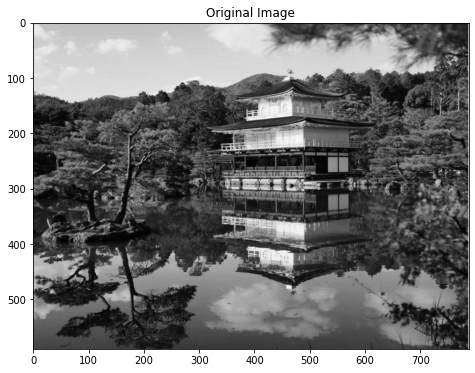

In [28]:
image = read_image("./images/kyoto.png", color=False)
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
show_image(image_gray, "Original Image")

In [29]:
def convolve2d_arr(a:np.ndarray, kernel_size:int):
    '''
    segment an image into multiple sub matrix
    '''
    sub_shape = (kernel_size,kernel_size)
    view_shape = tuple(np.subtract(a.shape, sub_shape) + 1) + sub_shape
    strides = a.strides + a.strides
    sub_matrices = np.lib.stride_tricks.as_strided(a,view_shape,strides)
    return sub_matrices


In [35]:
def avegare_blur(input_image:np.ndarray, kernel_size:int) -> np.ndarray:
    kernel_matrix = (1/kernel_size**2) * np.ones(shape=(kernel_size,kernel_size)).astype(np.float32)
    segmented = convolve2d_arr(input_image,kernel_size)
    m = np.einsum('kl,ijkl->ij',kernel_matrix,segmented)
    return m.astype(np.uint8)



def edge_detecting_sobel(gray_image: np.ndarray):
    segmented = convolve2d_arr(gray_image,3)
    sobel_x = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
    sobel_y= np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
    m_x = np.einsum('kl,ijkl->ij',sobel_x,segmented)
    m_y = np.einsum('kl,ijkl->ij',sobel_y,segmented)
    return (m_x+m_y)

def gaussian_blur(input_image:np.ndarray,kernel_size:int,sigma:float)->np.ndarray:
    '''just for gray image'''
    abs_len_k = (kernel_size-1)/2
    h1, h2 = np.meshgrid(np.arange(-abs_len_k,abs_len_k+1,step=1), np.arange(-abs_len_k,abs_len_k+1,step=1))
    kernel_matrix = np.exp(- (h1**2+h2**2) / (2*sigma**2))
    kernel_matrix = kernel_matrix / np.sum(kernel_matrix)
    segmented = convolve2d_arr(input_image,kernel_size)
    m = np.einsum('kl,ijkl->ij',kernel_matrix,segmented)
    return m.astype(np.uint8)




In [ ]:
show_image(avegare_blur(image_gray,10))
edgy_kids = edge_detecting_sobel(image_gray)
show_image(edgy_kids)


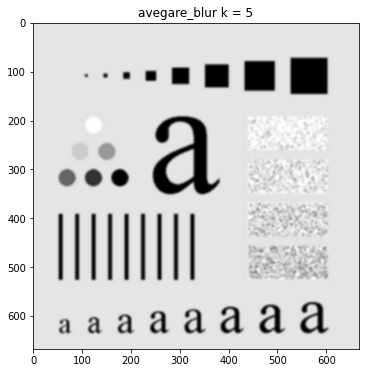

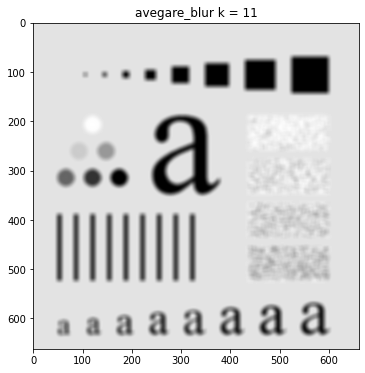

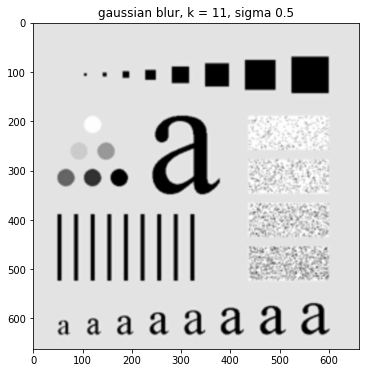

In [36]:
a_board = read_image("./images/a_char.png", color=False)
a_board_gray = cv2.cvtColor(a_board, cv2.COLOR_RGB2GRAY)
show_image(avegare_blur(a_board_gray,5),"avegare_blur k = 5")
show_image(avegare_blur(a_board_gray,11),"avegare_blur k = 11")
show_image(gaussian_blur(a_board_gray,11,0.5),"gaussian blur, k = 11, sigma 0.5")

In [32]:
class Exp():
    pass

class IntLit(Exp):
    def __init__(self,value):
        self.value = value
    
    def eval(self):
        return self.value
        
class FloatLit(Exp):
    def __init__(self,value):
        self.value = value
    
    def eval(self):
        return self.value
        
class BinExp(Exp):
    def __init__(self,e1,op,e2):
        self.e1 = e1
        self.op = op
        self.e2 = e2
    
    def eval(self):
        e1 = self.e1.eval()
        e2 = self.e2.eval()
        if(self.op == '+'): return e1 + e2
        elif(self.op == '-'): return e1 - e2
        elif(self.op == '*'): return e1 * e2
        else: return e1 / e2
        
class UnExp(Exp):
    def __init__(self,op,e):
        self.e = e
        self.op = op
    
    def eval(self):
        e = self.e.eval()
        if(self.op == '+'): return e
        else: return -e